In [4]:
from tensor.operation.generate import coil100_data, random_tensor
import threading
import numpy as np
import time
import matplotlib.pyplot as plt
try:
    import wget
except:
    %pip install wget

from tensor.decomposition.cpals import CP_ALS
from tensor.decomposition.cprand import CP_RAND


## Fit the model

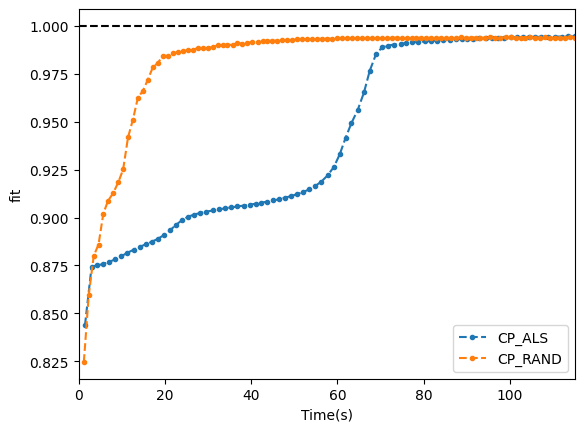

In [6]:
I = 300

X = random_tensor(3, (I, I, I), 5, 0.01)

_, stat1 = CP_ALS.decompose(X, 5, 100, 0.0001)
_, stat2 = CP_RAND.decompose(X, 5, 100, 0.0001)


plt.plot(stat1["cum_fit_time"], stat1["fit"], '.--', label="CP_ALS")
plt.plot(stat2["cum_fit_time"], stat2["fit"], '.--', label="CP_RAND")

lim = min(stat1["cum_fit_time"][-1], stat2["cum_fit_time"][-1])
plt.xlim(0, lim)
plt.hlines(1, 0, lim,  colors='k', linestyles='dashed')
plt.legend()
plt.xlabel("Time(s)")
plt.ylabel("fit")
plt.savefig("images/experiment_fit_a.png")
plt.show()


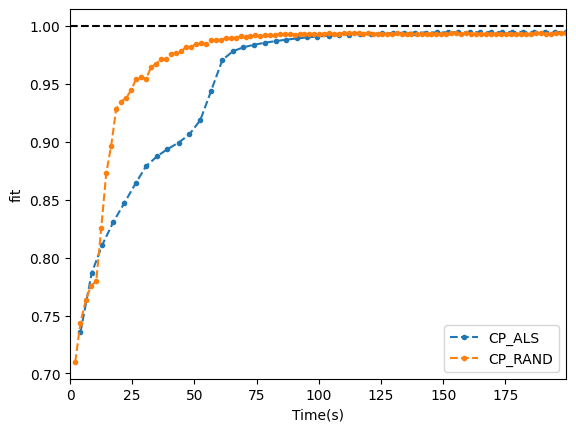

In [7]:
I = 80

X = random_tensor(4, (I, I, I, I), 5, 0.01)

_, stat1 = CP_ALS.decompose(X, 5, 100, 0.0001)
_, stat2 = CP_RAND.decompose(X, 5, 100, 0.0001)


plt.plot(stat1["cum_fit_time"], stat1["fit"], '.--', label="CP_ALS")
plt.plot(stat2["cum_fit_time"], stat2["fit"], '.--', label="CP_RAND")

lim = min(stat1["cum_fit_time"][-1], stat2["cum_fit_time"][-1])
plt.xlim(0, lim)
plt.hlines(1, 0, lim,  colors='k', linestyles='dashed')
plt.legend()
plt.xlabel("Time(s)")
plt.ylabel("fit")
plt.savefig("images/experiment_fit_b.png")
plt.show()


## Time per iteration

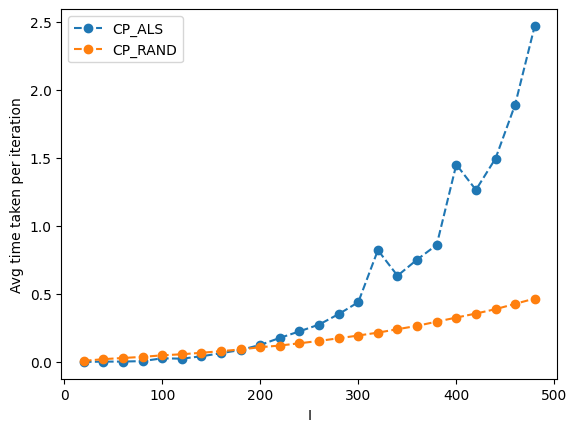

In [33]:
cpals_avg_time = []
cprand_avg_time = []
n = 2 # number of times to run the experiment for taking average
l, w, s = 20, 500, 20

for I in range(l, w, s):
    X  = random_tensor(3, (I,I,I), 7, 0.01)
    start = time.time()
    for _ in range(n):
       CP_ALS.decompose(X, 5, max_iter=10, eps=0.01, init_type="random", check_convergence=False)
    end = time.time()
    cpals_avg_time.append((end-start)/(n*10))

    start = time.time()
    for _ in range(n):
        CP_RAND.decompose(X, 5, max_iter=10, eps=0.01, init_type="random", check_convergence=False)
    end = time.time()
    cprand_avg_time.append((end-start)/(n*10))
    # print(f"For I = {I}, CP_ALS avg time = {cpals_avg_time[-1]}, CP_RAND avg time = {cprand_avg_time[-1]}")


plt.plot(range(l,w,s), cpals_avg_time, 'o--')    
plt.plot(range(l,w,s), cprand_avg_time, 'o--')
plt.legend(["CP_ALS", "CP_RAND"])
plt.xlabel("I")
plt.ylabel("Avg time taken per iteration")
plt.savefig("images/experiment_time_a.png")
plt.show()


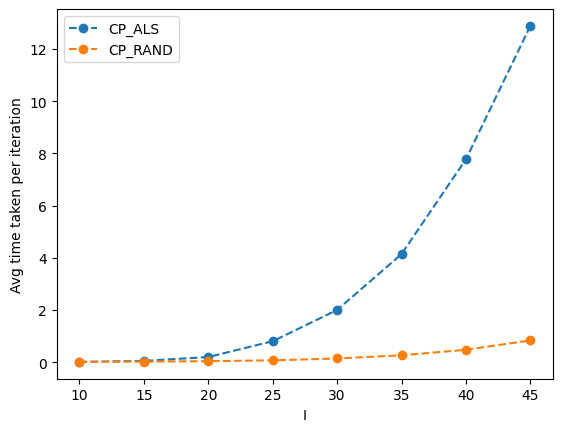

In [29]:
cpals_avg_time = []
cprand_avg_time = []
n = 1 # number of times to run the experiment for taking average
l, w, s = 10, 50, 5

for I in range(l, w, s):
    X  = random_tensor(5, (I,I,I,I,I), 7, 0.01)
    start = time.time()
    for _ in range(n):
       CP_ALS.decompose(X, 5, max_iter=10, eps=0.01, init_type="random", check_convergence=False)
    end = time.time()
    cpals_avg_time.append((end-start)/(n*10))

    start = time.time()
    for _ in range(n):
        CP_RAND.decompose(X, 5, max_iter=10, eps=0.01, init_type="random", check_convergence=False)
    end = time.time()
    cprand_avg_time.append((end-start)/(n*10))
    # print(f"For I = {I}, CP_ALS avg time = {cpals_avg_time[-1]}, CP_RAND avg time = {cprand_avg_time[-1]}")


plt.plot(range(l,w,s), cpals_avg_time, 'o--')    
plt.plot(range(l,w,s), cprand_avg_time, 'o--')
plt.legend(["CP_ALS", "CP_RAND"])
plt.xlabel("I")
plt.ylabel("Avg time taken per iteration")
plt.savefig("images/experiment_time_b.png")
plt.show()


# Stopping Criteria

In [ ]:
from tensor.operation.generate import coil100_data, random_tensor
import threading
import time
# %pip install matplotlib
import matplotlib.pyplot as plt
try:
    import wget
except:
    %pip install wget

from tensor.decomposition.cpals import CP_ALS
from tensor.decomposition.cprand import CP_RAND

cpals_avg_time_exact = []
cpals_avg_time_sampled = []

n = 4 # number of times to run the experiment for taking average
l, w, s = 100, 250, 10


for I in range(l, w, s):
   X  = random_tensor(3, (I,I,I), 7, 0.01)
   start = time.time()
   for _ in range(n):
      CP_ALS.decompose(X, 5, max_iter=100, eps=0.01, init_type="random", check_convergence=True)
   end = time.time()
   cpals_avg_time_exact.append((end-start)/(n*100))

   start = time.time()
   for _ in range(n):
      CP_ALS.decompose(X, 5, max_iter=100, eps=0.01, init_type="random", check_convergence=True, stopping_criteria="sampled")
   end = time.time()
   cpals_avg_time_sampled.append((end-start)/(n*100))

   print(f"For I = {I}, CP_ALS avg time (exact) = {cpals_avg_time_exact[-1]}, CP_ALS avg time (sampled) = {cpals_avg_time_sampled[-1]}")



plt.plot(range(l,w,s), cpals_avg_time_exact, 'o-')    
plt.plot(range(l,w,s), cpals_avg_time_sampled, 'o-')
# plt.plot(range(l,w,s), cprandmix_avg_time, 'o-')
plt.legend(["Exact", "Sampled"])
plt.xlabel("I")
plt.ylabel("Avg Time per Iteration (Order: 3)")
plt.show()


## Initialisation HOSVD vs Random

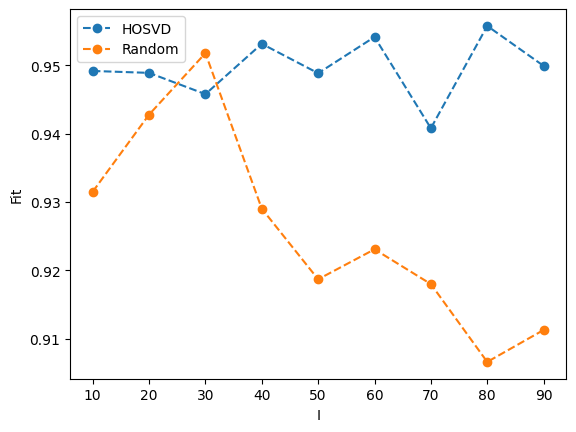

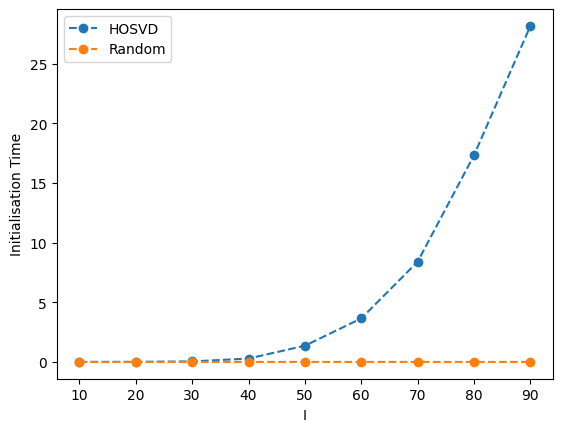

In [32]:
l, w, s, n = 10, 91, 10, 4
hosvd_avg_fit = []
random_avg_fit = []
hosvd_avg_init = []
random_avg_init = []

for I in range(l, w, s):
    hosvd_fit, random_fit = [], []
    hosvd_init, random_init = [], []
    for _ in range(n):

        X = random_tensor(3, (I, I, I), 5, 0.01)
        _, stat = CP_ALS.decompose(
            X, 5, max_iter=10, eps=0.0001, init_type="hosvd", check_convergence=False)
        hosvd_fit.append(stat["fit"][-1])
        hosvd_init.append(stat["init_time"])


        _, stat = CP_ALS.decompose(
            X, 5, max_iter=10, eps=0.0001, init_type="random", check_convergence=False)
        random_fit.append(stat["fit"][-1])
        random_init.append(stat["init_time"])

    hosvd_avg_fit.append(np.mean(hosvd_fit))
    random_avg_fit.append(np.mean(random_fit))
    hosvd_avg_init.append(np.mean(hosvd_init))
    random_avg_init.append(np.mean(random_init))

#     print(f"For I = {I}, HOSVD avg fit = {hosvd_avg_fit[-1]}, Random avg fit = {random_avg_fit[-1]}")

plt.plot(range(l, w, s), hosvd_avg_fit, 'o--')
plt.plot(range(l, w, s), random_avg_fit, 'o--')
plt.legend(["HOSVD", "Random"])
plt.xlabel("I")
plt.ylabel("Fit")
plt.savefig("images/experiment_hosvd_vs_random_fit.png")
plt.show()

plt.plot(range(l, w, s), hosvd_avg_init, 'o--')
plt.plot(range(l, w, s), random_avg_init, 'o--')
plt.legend(["HOSVD", "Random"])
plt.xlabel("I")
plt.ylabel("Initialisation Time")
plt.savefig("images/experiment_hosvd_vs_random_init.png")
plt.show()
